# PS10_CRM_BEDANIAN_DE_LESTABLE_RICHARDI_SCHOENENBERGER

In [1]:
#import
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import statsmodels.discrete.discrete_model as sm
from numpy.linalg import matrix_power

In [2]:
#import data
df1 = pd.read_csv(r'Credit.csv',sep=';')

# Exercise 1

## a)

In [3]:
y = df1[df1['Student'] == 0]['default']
x1 = df1[df1['Student'] == 0]['balance']
x2 = df1[df1['Student'] == 0]['income']
X = pd.DataFrame({'intercept': 1,'balance':x1,'income':x2})

In [4]:
logit = sm.Logit(y, X)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.028382
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  360
Model:                          Logit   Df Residuals:                      357
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2019   Pseudo R-squ.:                  0.9364
Time:                        16:01:03   Log-Likelihood:                -10.218
converged:                       True   LL-Null:                       -160.58
                                        LLR p-value:                 4.981e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -42.5995     12.859     -3.313      0.001     -67.803     -17.396
balance        0.0275      0

In [5]:
y1 = df1[df1['Student'] == 1]['default']
x11 = df1[df1['Student'] == 1]['balance']
x21 = df1[df1['Student'] == 1]['income']

X1 = pd.DataFrame({'balance':x11,'income':x21})
logit1 = sm.Logit(y1, X1)
print(logit1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.490261
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2019   Pseudo R-squ.:                 -0.3012
Time:                        16:01:04   Log-Likelihood:                -19.610
converged:                       True   LL-Null:                       -15.071
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance       -0.0024      0.001     -2.867      0.004      -0.004      -0.001
income         0.0190      0.

## b)

In [6]:
logit1.fit().predict(np.array([500,100]))

Optimization terminated successfully.
         Current function value: 0.490261
         Iterations 6


array([0.66657201])

The default probability for a student with balance 500 an d income 100 is 0.667

## c)

The confusion matrix for the non student is:

In [7]:
logit.fit().pred_table(threshold = 0.5)

Optimization terminated successfully.
         Current function value: 0.028382
         Iterations 13


array([[300.,   1.],
       [  3.,  56.]])

The confusion matrix for the student is:

In [8]:
logit1.fit().pred_table(threshold = 0.5)

Optimization terminated successfully.
         Current function value: 0.490261
         Iterations 6


array([[28.,  7.],
       [ 4.,  1.]])

# Exercise 2

## a)

We compute the confusion matrix: 

In [9]:
#a, transition matrix completed as requested in exercise
transition_matrix = np.matrix([[0.95,0.05,0,0],[0.05,0.8,0.1,0.05],[0.0,0.2,0.5,0.3],[0.0,0.0,0.0,1.0]])
transition_matrix

matrix([[0.95, 0.05, 0.  , 0.  ],
        [0.05, 0.8 , 0.1 , 0.05],
        [0.  , 0.2 , 0.5 , 0.3 ],
        [0.  , 0.  , 0.  , 1.  ]])

## b)

In [10]:
#b
def_a = []
def_b = []
def_c = []
def_d = []

T = 20
for t in range(0,T):
    a = np.asarray([1,0,0,0])
    b = np.asarray([0,1,0,0])
    c = np.asarray([0,0,1,0])
    d = np.asarray([0,0,0,1])
    
    transition = matrix_power(transition_matrix,t+1)

    default_a = a @ transition  
    def_a = np.append(def_a, default_a[0,3])
    
    default_b = b @ transition  
    def_b = np.append(def_b, default_b[0,3])
    
    default_c = c @ transition 
    def_c = np.append(def_c, default_c[0,3])
    
    default_d = d @ transition
    def_d = np.append(def_d, default_d[0,3])

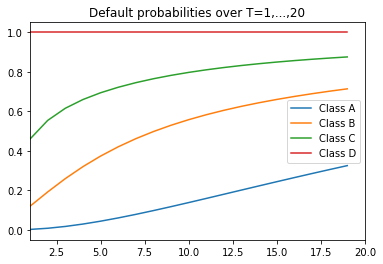

In [11]:
plt.plot(range(0,T),def_a)
plt.plot(def_b)
plt.plot(def_c)
plt.plot(def_d)
plt.legend(['Class A','Class B','Class C', 'Class D'])
plt.title('Default probabilities over T=1,...,20')
plt.xlim((1,20))
plt.show()

## c)

We compute the transition probability:

In [12]:
# c
credit_ratings = pd.read_csv('CR.csv',sep=';')
credit_ratings = credit_ratings.drop(['Firms'], axis=1).dropna()

transition_pairs = [['A','A'],['A','B'],['A','C'],['A','D'], ['B','A'],['B','B'],['B','C'],['B','D'],
        ['C','A'],['C','B'],['C','C'],['C','D'],['D','A'],['D','B'],['D','C'],['D','D']]

transition_prob = []

#Compute the MLE estimator
for p in transition_pairs:
    denominator = np.sum([credit_ratings.iloc[i].str.count(p[0]).sum() for i in range(0,19)])
    num = []
    for i in range(0,19):
        num.append((credit_ratings.iloc[i]==p[0])&(credit_ratings.iloc[i+1]==p[1]))
    numerator = np.sum(num)
    transition_prob.append(numerator/denominator)

transition_prob = pd.DataFrame(np.array(transition_prob).reshape((4,4)),columns=['A','B','C','D'],index=['A','B','C','D'])
print(transition_prob)

          A         B         C         D
A  0.949259  0.050741  0.000000  0.000000
B  0.050211  0.797890  0.106751  0.045148
C  0.000000  0.191964  0.498512  0.309524
D  0.000000  0.000000  0.000000  1.000000
